# Task 4.10 part 1

Table of Contents 

1.Import data set.

2.Consider security implications. 

3.Regional segmentation of the data.

4.Exclusion flag for low-activity customers.

5.Profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

6.Visualizations.

7.Export data to continue in the next script

# Step 1

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter

In [2]:
#Import df
df_ords_customers = pd.read_pickle(r'/Users/marianino/Desktop/Instacart Basket Analysis/Data/Prepared Data/orders_products_customer_merged.pkl')

In [3]:
#Checking df
df_ords_customers.shape

(32404859, 33)

# Step 2

Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [4]:
#Delete the first name and last name of the customers for security reasons
df_2 = df_ords_customers.drop(columns = ['first_name', 'last_name'])

In [5]:
#Checking new df
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,median_orders,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,10.4,Regular customer,Male,Minnesota,81,2019-08-01,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,10.4,Regular customer,Male,Minnesota,81,2019-08-01,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,10.4,Regular customer,Male,Minnesota,81,2019-08-01,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,10.4,Regular customer,Male,Minnesota,81,2019-08-01,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,10.4,Regular customer,Male,Minnesota,81,2019-08-01,1,married,49620,both


In [6]:
df_2.shape

(32404859, 31)

# Step 3

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [7]:
#Assign states to the 'Midwest' region
df_2.loc[(df_2['state'] == 'Minnesota') |
(df_2['state'] == 'Iowa') |
(df_2['state'] == 'Michigan') |
(df_2['state'] == 'Wisconsin') |
(df_2['state'] == 'Illinois') |
(df_2['state'] == 'Indiana')|
(df_2['state'] == 'North Dakota')|
(df_2['state'] == 'South Dakota')|
(df_2['state'] == 'Nebraska')|
(df_2['state'] == 'Kansas')|
(df_2['state'] == 'Missouri')|
(df_2['state'] == 'Ohio'),
'region'] = 'Midwest'

/var/folders/zq/gd226qtd2tq509tvr0_wm2kc0000gn/T/ipykernel_9269/998502209.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Midwest' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_2.loc[(df_2['state'] == 'Minnesota') |


In [8]:
#Assign states to the 'Northeast' region
df_2.loc[(df_2['state'] == 'Maine') |
(df_2['state'] == 'New Hampshire') |
(df_2['state'] == 'Vermont') |
(df_2['state'] == 'Massachusetts') |
(df_2['state'] == 'Rhode Island') |
(df_2['state'] == 'Connecticut')|
(df_2['state'] == 'New York')|
(df_2['state'] == 'Pennsylvania')|
(df_2['state'] == 'New Jersey'),
'region'] = 'Northeast'

In [9]:
#Assign states to the 'South' region
df_2.loc[(df_2['state'] == 'Delaware') |
(df_2['state'] == 'Maryland') |
(df_2['state'] == 'District of Columbia') |
(df_2['state'] == 'Virginia') |
(df_2['state'] == 'West Virginia') |
(df_2['state'] == 'North Carolina')|
(df_2['state'] == 'South Carolina')|
(df_2['state'] == 'Georgia')|
(df_2['state'] == 'Kentucky')|
(df_2['state'] == 'Tennessee')|
(df_2['state'] == 'Mississippi')|
(df_2['state'] == 'Alabama')|
(df_2['state'] == 'Oklahoma')|
(df_2['state'] == 'Texas')|
(df_2['state'] == 'Arkansas')|
(df_2['state'] == 'Louisiana')|
(df_2['state'] == 'Florida'),
'region'] = 'South'

In [10]:
#Assign states to the 'West' region
df_2.loc[(df_2['state'] == 'Idaho') |
(df_2['state'] == 'Montana') |
(df_2['state'] == 'Wyoming') |
(df_2['state'] == 'Nevada') |
(df_2['state'] == 'Utah') |
(df_2['state'] == 'Colorado')|
(df_2['state'] == 'Arizona')|
(df_2['state'] == 'New Mexico')|
(df_2['state'] == 'Alaska')|
(df_2['state'] == 'Washington')|
(df_2['state'] == 'Oregon')|
(df_2['state'] == 'California')|
(df_2['state'] == 'Hawaii'),
'region'] = 'West'

Determine whether there’s a difference in spending habits between the different U.S. regions. 

In [11]:
#Create pivot table that aggregates spending types based on region.
df_3 = df_2.pivot_table(index = 'region', columns = 'spending_flag', aggfunc = 'size', fill_value = 0)

In [12]:
#Check df_3 results
df_3

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [13]:
#Show the total amount spent by all customers for each region.
df_2.groupby('region')['prices'].sum()

region
Midwest       96603658.7
Northeast     66126199.8
South        131613265.4
West          93874398.7
Name: prices, dtype: float64

Observation: There is a difference in spending habits across the country. It seems that people in the South tend to be both high spender and low spender. While people in the Northeast tend to spend less overall. 

# Step 4

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 

In [14]:
#Create a new column named 'order_flag' and insert the text 'Fewer than 5' if the user has made fewer than 5 orders.
#If the user has made 5 or more orders, insert the text '5 or more'.

df_2['order_flag'] = np.where(df_2['max_order'] < 5, 'Fewer than 5', '5 or more')

In [15]:
#Check results
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,order_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,5 or more
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,5 or more
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,5 or more
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,5 or more
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,5 or more


In [16]:
df_2.tail()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,order_flag
32404854,49235,Organic Half & Half,53,16,1.8,2542346,80734,3,3,8,...,Male,Alabama,45,2019-09-28,1,married,41072,both,South,Fewer than 5
32404855,49520,Orange Sparkling Water,115,7,7.5,1363278,74506,1,1,14,...,Male,Vermont,44,2018-04-16,3,married,97209,both,Northeast,Fewer than 5
32404856,49520,Orange Sparkling Water,115,7,7.5,2008002,74506,2,0,15,...,Male,Vermont,44,2018-04-16,3,married,97209,both,Northeast,Fewer than 5
32404857,49520,Orange Sparkling Water,115,7,7.5,1595973,74506,3,1,17,...,Male,Vermont,44,2018-04-16,3,married,97209,both,Northeast,Fewer than 5
32404858,49520,Orange Sparkling Water,115,7,7.5,1680478,74506,4,0,16,...,Male,Vermont,44,2018-04-16,3,married,97209,both,Northeast,Fewer than 5


In [17]:
df_fewer_than_5 = df_2[df_2['order_flag'] == 'Fewer than 5']

In [18]:
#Assign all orders with an 'order_flag' value of '5 or more' to the df_2 dataframe.
df_2 = df_2[df_2['order_flag'] == '5 or more']

In [19]:
#Check results
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,order_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,5 or more
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,5 or more
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,5 or more
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,5 or more
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,5 or more


In [20]:
df_2.tail()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,order_flag
32404843,49235,Organic Half & Half,53,16,1.8,3310701,27382,5,3,9,...,Female,Vermont,68,2019-11-25,3,married,37867,both,Northeast,5 or more
32404844,49235,Organic Half & Half,53,16,1.8,527883,27382,6,1,12,...,Female,Vermont,68,2019-11-25,3,married,37867,both,Northeast,5 or more
32404845,49235,Organic Half & Half,53,16,1.8,685496,27382,7,4,8,...,Female,Vermont,68,2019-11-25,3,married,37867,both,Northeast,5 or more
32404846,49235,Organic Half & Half,53,16,1.8,1224680,27382,8,1,7,...,Female,Vermont,68,2019-11-25,3,married,37867,both,Northeast,5 or more
32404847,49235,Organic Half & Half,53,16,1.8,2223687,27382,9,2,12,...,Female,Vermont,68,2019-11-25,3,married,37867,both,Northeast,5 or more


# Step 5 & 6

Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. 

Create an appropriate visualization to show the distribution of profiles.

# Age Flag

In [21]:
df_2.loc[df_2['age'] <=34, 'age_range'] = 'Young-Adult'

/var/folders/zq/gd226qtd2tq509tvr0_wm2kc0000gn/T/ipykernel_9269/66503438.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Young-Adult' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_2.loc[df_2['age'] <=34, 'age_range'] = 'Young-Adult'


In [22]:
df_2.loc[(df_2['age'] >=35) & (df_2['age'] <= 64), 'age_range'] = 'Middle-Aged'

In [23]:
df_2.loc[df_2['age'] >= 65, 'age_range'] = 'Older'

In [24]:
#Check data
df_2['age_range'].value_counts(dropna = False)

age_range
Middle-Aged    14526725
Young-Adult     8242295
Older           8195544
Name: count, dtype: int64

/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


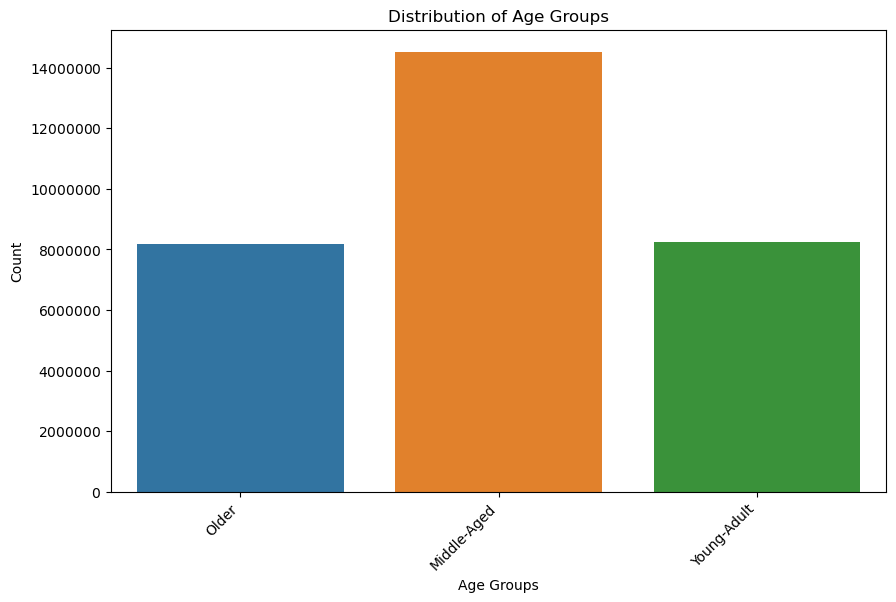

In [25]:
#Bar chart for the age flag

plt.figure(figsize=(10, 6))
barchart1 = sns.countplot(data=df_2, x='age_range')
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='plain', useOffset=False)

plt.title('Distribution of Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.show()

In [26]:
#Export Bar chart
barchart1.figure.savefig(r'/Users/marianino/Desktop/Instacart Basket Analysis/Analysis/Visualizations/distribution_of_age_groups.png')

# Income flag

In [27]:
#Check distribution of incomes
df_2.agg({'income': ['mean', 'std', 'min', 'max']})

,income
mean,99675.865108
std,43141.865526
min,25903.000000
max,593901.000000


In [28]:
#Calculate range to account for an average income as one standard deviation above and below mean
bottom_avg_inc = df_2['income'].mean() - df_2['income'].std()
top_avg_inc = df_2['income'].mean() + df_2['income'].std()

In [29]:
print(bottom_avg_inc)

56533.99958154206


In [30]:
print(top_avg_inc)

142817.73063355155


In [31]:
#Income flag(below average, average, above average)
df_2.loc[df_2['income'] >= 142818, 'Income_Level'] ='Above Avg Income'
df_2.loc[(df_2['income'] < 142818) & (df_2['income'] >= 56534), 'Income_Level'] = 'Avg Income'
df_2.loc[df_2['income'] < 56534, 'Income_Level'] = 'Below Avg Income'

/var/folders/zq/gd226qtd2tq509tvr0_wm2kc0000gn/T/ipykernel_9269/3615857061.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Above Avg Income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_2.loc[df_2['income'] >= 142818, 'Income_Level'] ='Above Avg Income'


In [32]:
#Check data
df_2['Income_Level'].value_counts(dropna = False)

Income_Level
Avg Income          20923960
Above Avg Income     5173082
Below Avg Income     4867522
Name: count, dtype: int64

/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


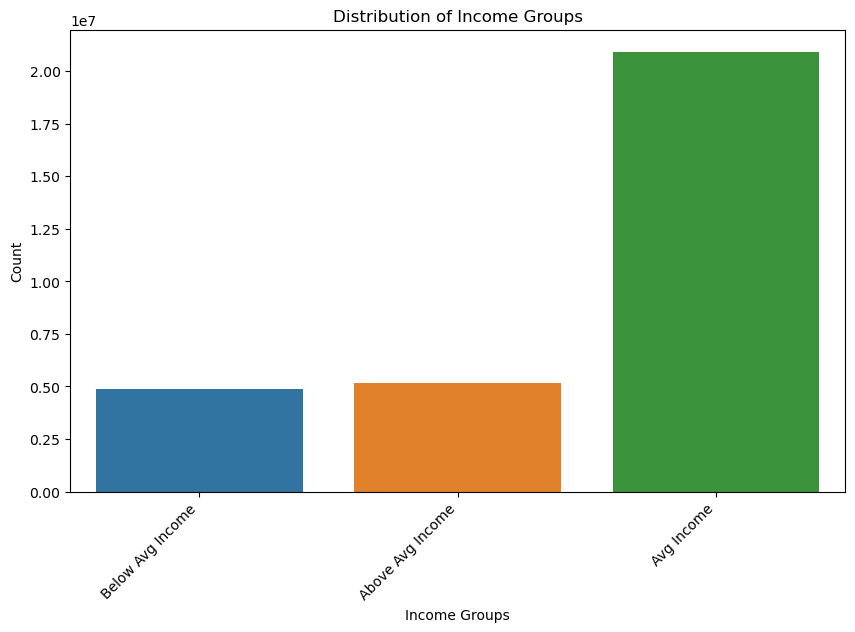

In [33]:
#Bar chart for income

plt.figure(figsize = (10, 6))
barchart2 = sns.countplot(data = df_2, x = 'Income_Level')


plt.title('Distribution of Income Groups')
plt.xlabel('Income Groups')
plt.ylabel('Count')
plt.xticks(rotation = 45, ha = 'right')

plt.show()

In [34]:
#Export Bar chart
barchart2.figure.savefig(r'/Users/marianino/Desktop/Instacart Basket Analysis/Analysis/Visualizations/distribution_of_income.png')

# Dependant flag

In [35]:
df_2.loc[df_2['n_dependants'] == 0, 'dependants_flag'] = "No children"

/var/folders/zq/gd226qtd2tq509tvr0_wm2kc0000gn/T/ipykernel_9269/612236021.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No children' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_2.loc[df_2['n_dependants'] == 0, 'dependants_flag'] = "No children"


In [36]:
df_2.loc[df_2['n_dependants'] >= 1, 'dependants_flag'] = "Has children"

/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


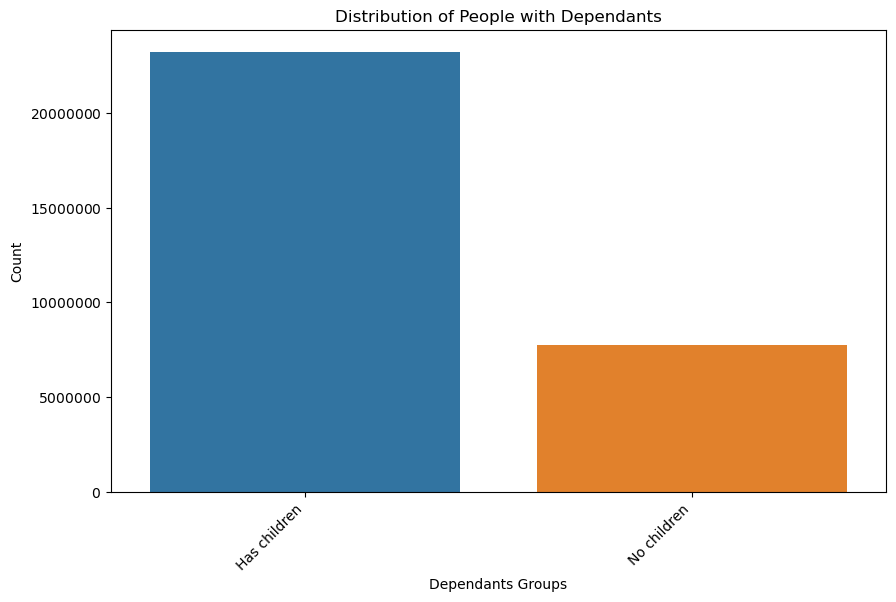

In [37]:
#Bar chart for dependants

plt.figure(figsize = (10, 6))
barchart3 = sns.countplot(data = df_2, x = 'dependants_flag')
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='plain', useOffset=False)

plt.title('Distribution of People with Dependants')
plt.xlabel('Dependants Groups')
plt.ylabel('Count')
plt.xticks(rotation = 45, ha = 'right')

plt.show()

In [38]:
#Export Bar chart
barchart3.figure.savefig(r'/Users/marianino/Desktop/Instacart Basket Analysis/Analysis/Visualizations/distribution_of_people_with_children.png')

# Export Data

In [39]:
df_2.to_pickle(r'/Users/marianino/Desktop/Instacart Basket Analysis/Data/Prepared Data/final_data.pkl')